### **1. Introduction**
This report presents an exploratory data analysis (EDA) of the `StudentsPerformance` dataset. The goal of this analysis was to understand the factors affecting student performance in math, reading, and writing exams.

In [2]:
# Lets import all required modules:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting a unique style of plots:
plt.style.use('ggplot')
sns.set_palette('pastel')

In [ ]:
# I had to install tabulate library . Its specialised in representing the data in tabular form.
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\tabulate.exe' -> 'c:\\Python312\\Scripts\\tabulate.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### **2. Key Findings**

Based on the analysis, several factors were found to be correlated with student performance:


In [34]:
# Loding Students Performance Data as DataFrames:
df = pd.read_csv('C:\\Users\\Rachit\\OneDrive\\Documents\\Machine Learning\\Notebook\\Data\\StudentsPerformance.csv')
print("FIRST 10 ROWS OF THE DATAFRAME:")
print(df.head(11).to_markdown(index=False, numalign="left", stralign="left"))

FIRST 10 ROWS OF THE DATAFRAME:
| gender   | race/ethnicity   | parental level of education   | lunch        | test preparation course   | math score   | reading score   | writing score   |
|:---------|:-----------------|:------------------------------|:-------------|:--------------------------|:-------------|:----------------|:----------------|
| female   | group B          | bachelor's degree             | standard     | none                      | 72           | 72              | 74              |
| female   | group C          | some college                  | standard     | completed                 | 69           | 90              | 88              |
| female   | group B          | master's degree               | standard     | none                      | 90           | 95              | 93              |
| male     | group A          | associate's degree            | free/reduced | none                      | 47           | 57              | 44              |
| male     | group C

In [35]:
print("Information about the DataFrame:\n")
df.info()

Information about the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
print("Descriptive satatistics for scores:\n")
print(df.describe().to_markdown(numalign="left",stralign="left"))

Descriptive satatistics for scores:

|       | math score   | reading score   | writing score   |
|:------|:-------------|:----------------|:----------------|
| count | 1000         | 1000            | 1000            |
| mean  | 66.089       | 69.169          | 68.054          |
| std   | 15.1631      | 14.6002         | 15.1957         |
| min   | 0            | 17              | 10              |
| 25%   | 57           | 59              | 57.75           |
| 50%   | 66           | 70              | 69              |
| 75%   | 77           | 79              | 79              |
| max   | 100          | 100             | 100             |


**Gender-wise Performance:**
     **Female** students, on average, performed better in **reading** and **writing**.
     **Male** students, on average, performed better in **math**.


In [37]:
# creating a combined overall score for later analysis:
df['overall_score'] = df[['math score','reading score','writing score']].mean(axis=1)

In [38]:
# Lets do gender wise analysis:
gender_scores = df.groupby('gender')[['math score','reading score','writing score']].mean()
print("Average Scores opted as per Gender:\n")
print(gender_scores.to_markdown(numalign='left', stralign='left'))

Average Scores opted as per Gender:

| gender   | math score   | reading score   | writing score   |
|:---------|:-------------|:----------------|:----------------|
| female   | 63.6332      | 72.6081         | 72.4672         |
| male     | 68.7282      | 65.473          | 63.3112         |


In [39]:
gender_scores_plot = gender_scores.reset_index().melt(id_vars='gender', var_name='subject', value_name='average_score')

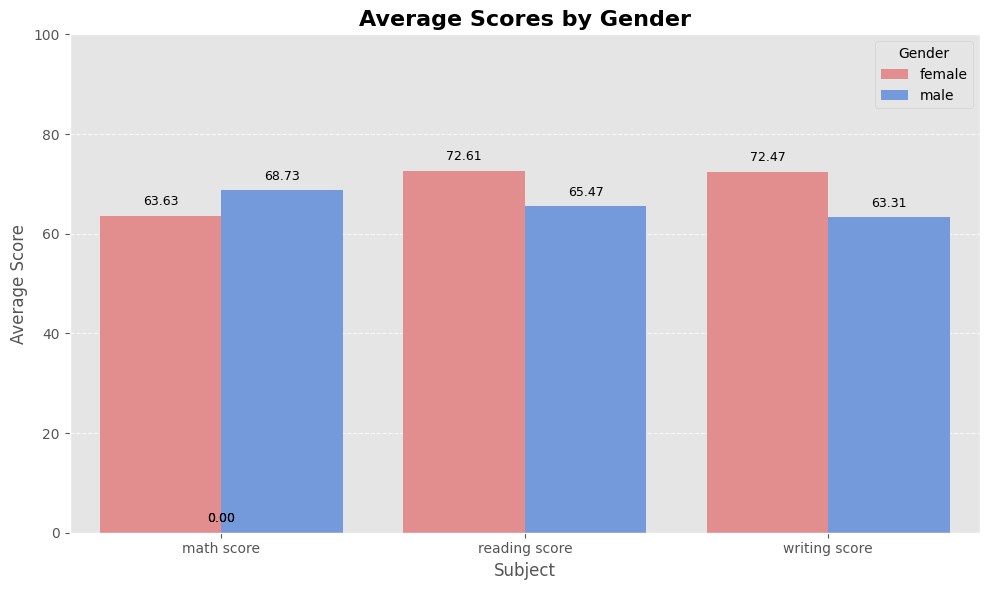

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='average_score', hue='gender', data=gender_scores_plot, palette={'male': 'cornflowerblue', 'female': 'lightcoral'})
plt.title('Average Scores by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Gender', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, color='black')
plt.tight_layout()
plt.savefig('gender_scores_bar_chart.png')

* **Impact of Test Preparation Course:**
    * Students who **completed** the test preparation course achieved a significantly higher average overall score than those who did not.


In [41]:
# Test preparation course analysis:
prep_course_scores = df.groupby('test preparation course')['overall_score'].mean().reset_index()

C:\Users\Rachit\AppData\Local\Temp\ipykernel_17344\86291862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test preparation course', y='overall_score', data=prep_course_scores, palette=['lightgreen', 'salmon'])


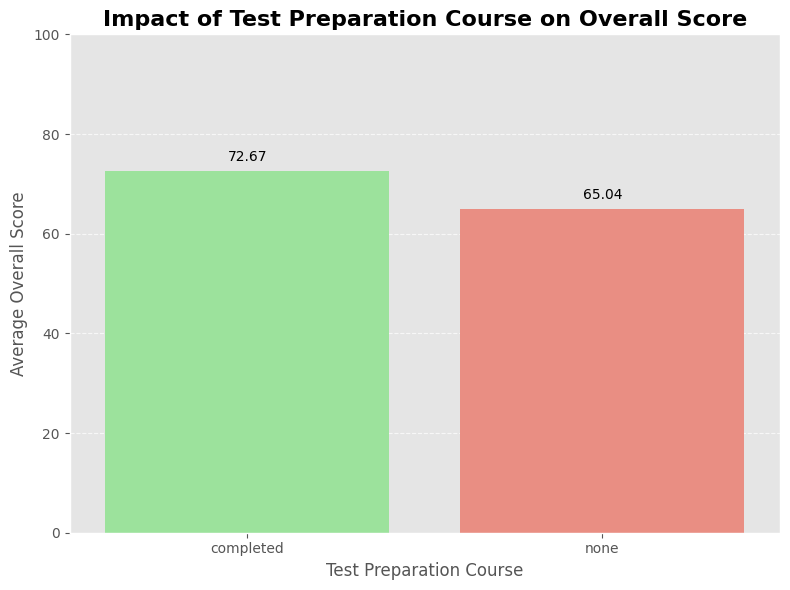

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x='test preparation course', y='overall_score', data=prep_course_scores, palette=['lightgreen', 'salmon'])
plt.title('Impact of Test Preparation Course on Overall Score', fontsize=16, fontweight='bold')
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('test_prep_impact_bar_chart.png')

* **Parental Level of Education:**
    * There is a clear positive correlation between a parent's education level and their child's scores.
    * Students whose parents have a **master's** or **bachelor's degree** tend to have higher average scores.


In [43]:
# 5. Parental Level of Education Analysis:
parental_edu_scores = df.groupby('parental level of education')['overall_score'].mean().sort_values(ascending=False).reset_index()


C:\Users\Rachit\AppData\Local\Temp\ipykernel_17344\1844750481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overall_score', y='parental level of education', data=parental_edu_scores, palette='viridis')


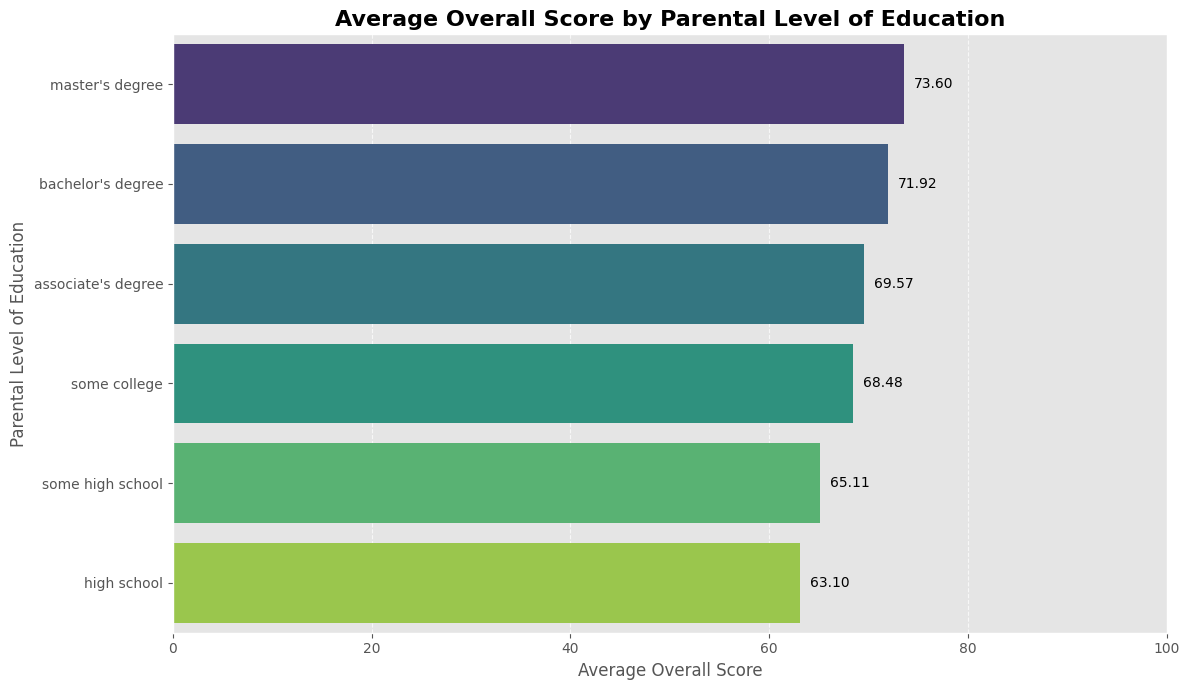

In [44]:
plt.figure(figsize=(12, 7))
sns.barplot(x='overall_score', y='parental level of education', data=parental_edu_scores, palette='viridis')
plt.title('Average Overall Score by Parental Level of Education', fontsize=16, fontweight='bold')
plt.xlabel('Average Overall Score', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)
plt.xlim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, row in parental_edu_scores.iterrows():
    plt.text(row.overall_score + 1, index, f'{row.overall_score:.2f}', color='black', ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('parental_edu_impact_bar_chart.png')

* **Race/Ethnicity:**
    * Student performance varied across different racial and ethnic groups. In this dataset, **Group E** had the highest average score, while **Group A** had the lowest.


In [45]:
# 6. Race/Ethnicity Analysis:
race_scores = df.groupby('race/ethnicity')['overall_score'].mean().sort_values(ascending=False).reset_index()


C:\Users\Rachit\AppData\Local\Temp\ipykernel_17344\1901365084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race/ethnicity', y='overall_score', data=race_scores, palette='magma')


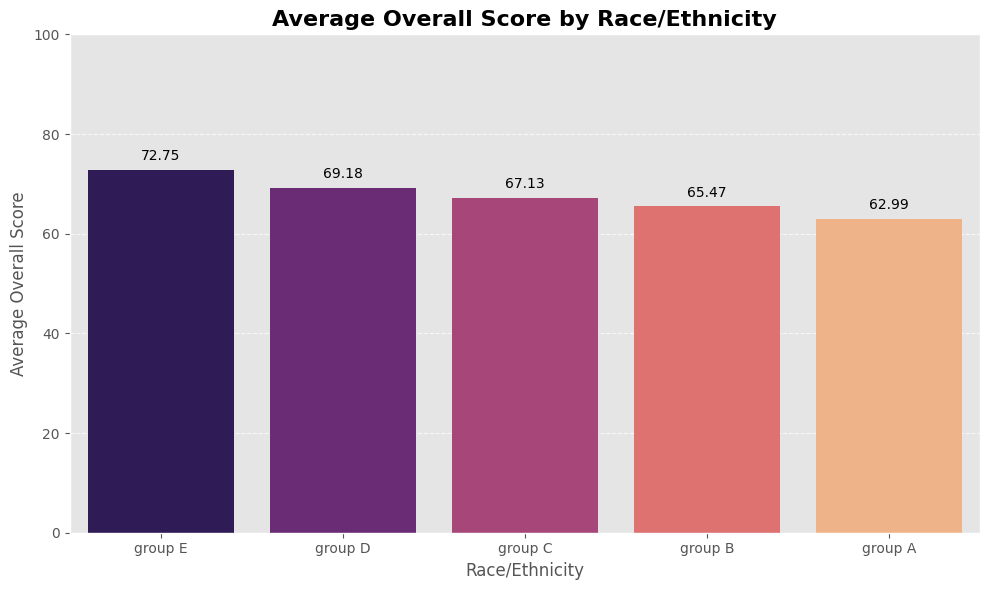

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='overall_score', data=race_scores, palette='magma')
plt.title('Average Overall Score by Race/Ethnicity', fontsize=16, fontweight='bold')
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('race_impact_bar_chart.png')

* **Correlation between Subjects:**
    * There is a very strong positive correlation between **reading** and **writing** scores ($r \approx 0.95$).
    * All three subjects—math, reading, and writing—are strongly correlated with each other ($r \approx 0.80$ with math).


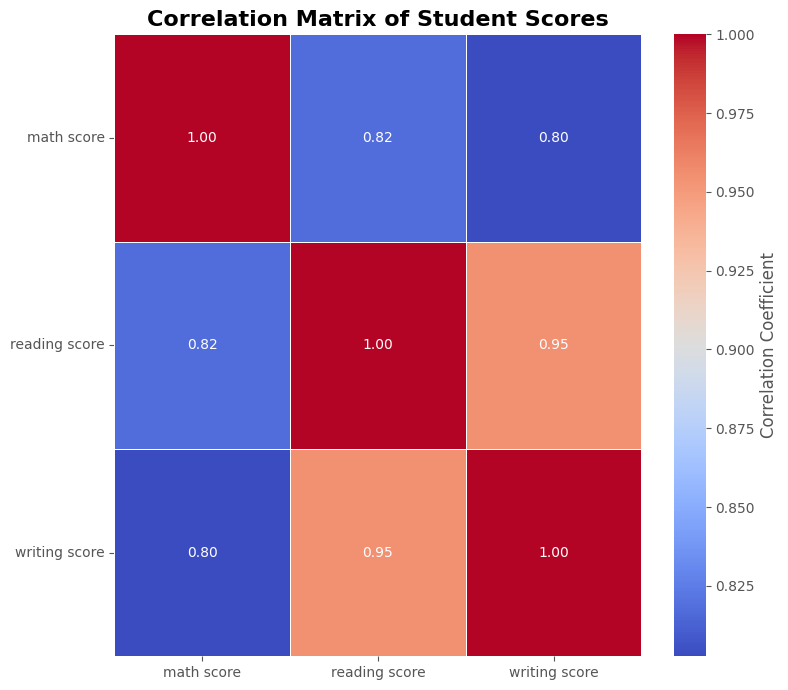

In [47]:
# Lets find the co-relation:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Student Scores', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.savefig('scores_correlation_heatmap.png')

### **3. Conclusion**

The analysis shows that a student's performance is not isolated but is influenced by several factors, including gender, test preparation, parental education, and race/ethnicity. The strong correlations between subject scores suggest that a student's overall academic ability is a consistent predictor of performance across different subjects.

